In [1]:
import state_utils

state_utils.set_cohort("Poyet")
state_utils.set_host("ao")
state_utils.set_midas_db_type("standard")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config
import os

In [2]:
letter_list = ["A","B","C"]

In [3]:
analysis_dir = config.analysis_directory

all_species = os.listdir("%s/clusters/Poyet/%s" % (analysis_dir,config.host))

In [4]:
spec_df = pd.read_csv("%sspecies/relative_abundance.txt.bz2" % config.data_directory,index_col=0,sep="\t")

In [5]:
tot_strain_df = pd.DataFrame(columns=config.host_samples)

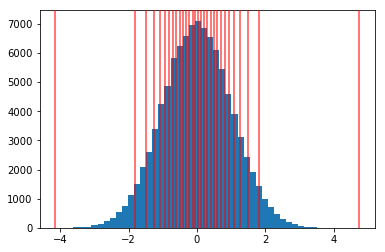

In [110]:
x = np.random.normal(0,1,100000)
plt.hist(x,bins=50);

p = np.percentile(x,np.linspace(0,100,30))
for f in p:
    plt.axvline(f,color="red",zorder=10,alpha=.7)

In [111]:
p

array([-4.15629675, -1.82016063, -1.48228552, -1.2595449 , -1.08915016,
       -0.94640519, -0.81886867, -0.70471596, -0.60172671, -0.50172363,
       -0.40639925, -0.31032379, -0.21950462, -0.13023015, -0.04380404,
        0.04247458,  0.12951763,  0.21682296,  0.30766872,  0.40064522,
        0.49688795,  0.59513532,  0.70108812,  0.81659163,  0.94504993,
        1.08901396,  1.26337236,  1.48538843,  1.82421799,  4.74847016])

In [ ]:
species="Bacteroides_vulgatus_57955"
cluster_dir = "%s/clusters/Poyet/%s/%s" % (analysis_dir,config.host,species)

strain_snv_dic = {}
strain_centroid_dic = {}
i = 0

for strain in os.listdir(cluster_dir):

    strain_label = "%s_%s" % (species,letter_list[i])
    df = pd.read_csv("%s/%s" % (cluster_dir,strain),index_col=0)
    strain_snv_dic[strain_label] = df
    strain_centroid_dic[strain_label] = df.median()
    i+=1

In [ ]:
strain_centroid_dic = pd.DataFrame(strain_centroid_dic)
spec_strain_df = spec_df.loc[species]*strain_centroid_dic.T

In [6]:
spec_strain_df = {}

In [7]:
tot_strain_df = pd.DataFrame(columns=config.dates.index)

In [8]:
for species in all_species:
    
    cluster_dir = "%s/clusters/Poyet/%s/%s" % (analysis_dir,config.host,species)

    strain_snv_dic = {}
    strain_centroid_dic = {}
    i = 0

    for strain in os.listdir(cluster_dir):
        
        strain_label = "%s_%s" % (species,letter_list[i])
        df = pd.read_csv("%s/%s" % (cluster_dir,strain),index_col=0)
        strain_snv_dic[strain_label] = df
        strain_centroid_dic[strain_label] = df.median()
        
        print(strain_centroid_dic[strain_label].min() == 1)
        
        i+=1
    
    strain_centroid_dic = pd.DataFrame(strain_centroid_dic)
    
    if strain_centroid_dic.shape[1] < 2:
        if strain_centroid_dic["%s_%s" % (species,letter_list[0])].min() != 1.0:
            strain_centroid_dic["%s_%s" % (species,letter_list[1])] = 1 - strain_centroid_dic["%s_%s" % (species,letter_list[0])]

    spec_strain_df = spec_df.loc[species]*strain_centroid_dic.T
    
    for idx in spec_strain_df.index:
        tot_strain_df.loc[idx] = spec_strain_df.loc[idx]

True
True
True
True
True
True
True
False
False
False
True


In [9]:
tot_strain_df.index

Index([u'Eubacterium_eligens_61678_A', u'Bifidobacterium_adolescentis_56815_A',
       u'Ruminococcus_bicirculans_59300_A',
       u'Faecalibacterium_prausnitzii_62201_A', u'Dialister_invisus_61905_A',
       u'Bacteroides_uniformis_57318_A', u'Eubacterium_rectale_56927_A',
       u'Bacteroides_xylanisolvens_57185_A',
       u'Bacteroides_xylanisolvens_57185_B', u'Bacteroides_ovatus_58035_A',
       u'Bacteroides_ovatus_58035_B', u'Faecalibacterium_prausnitzii_61481_A',
       u'Faecalibacterium_prausnitzii_61481_B',
       u'Bacteroides_fragilis_54507_A'],
      dtype='object')

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
tot_strain_df.loc["Ruminococcus_bromii_62047_A"].plot(legend=None,ax=ax)
tot_strain_df.loc["Bacteroides_vulgatus_57955_B"].plot(legend=None,ax=ax)

#ax.semilogy()

In [ ]:
tot_strain_df.loc["Ruminococcus_bromii_62047_A"].dropna().plot()

In [ ]:
tot_strain_df.loc["Bacteroides_cellulosilyticus_58046_A"].dropna()

In [ ]:
tot_strain_df.loc["Bacteroides_massiliensis_44749_A"].dropna()

In [ ]:
tot_strain_df.columns = config.dates.loc[tot_strain_df.columns]

In [ ]:
obs_data = tot_strain_df.loc["Bacteroides_ovatus_58035_A"].dropna()
strain_dates = obs_data.index
train_num = int(len(obs_data)/2) - 1
train_num
train_num = np.argmin(abs((strain_dates.values - strain_dates[-1]/2)))

In [14]:
from sklearn.metrics import auc

In [112]:
dates = config.dates

In [130]:
strain = "Faecalibacterium_prausnitzii_61481_B"
obs_data = tot_strain_df.loc[strain]
obs_data = obs_data[obs_data.notna()]
strain_dates = dates.loc[obs_data.index].sort_values()
obs_data = obs_data.loc[strain_dates.index]
#train_num = int(len(obs_data)/2)
train_num = np.argmin(abs((strain_dates.values - 2.0*strain_dates[-1]/3))) 

In [131]:
train_num 

36

In [132]:
np.argwhere(strain_dates.index == config.dates.index[train_num])

array([[30]])

In [133]:
train_num

36

In [134]:
obs_data[:train_num].mean()

0.03031860706799132

In [135]:
auc(strain_dates[:train_num],obs_data[:train_num])/(strain_dates[train_num] - strain_dates[0])

0.03492027564206663

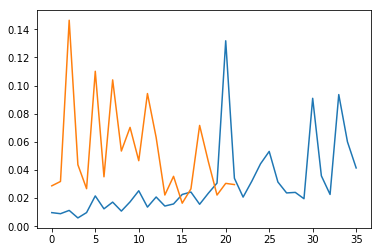

In [136]:
plt.plot(obs_data.values[:train_num])
plt.plot(obs_data.values[train_num:])

In [ ]:
obs_data.values.mean()

In [ ]:
obs_data

In [14]:
train_num = int(len(obs_data)/2) 

In [ ]:
train_num = np.argmin(abs((strain_dates.values - strain_dates[-1]/2))) 

In [ ]:
plt.plot(strain_dates.values,obs_data.values)
plt.axvline(strain_dates.values[train_num])

In [ ]:
obs_data[:120]

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

tot_strain_df.loc["Faecalibacterium_prausnitzii_61481_A"].dropna().plot()
tot_strain_df.loc["Faecalibacterium_prausnitzii_61481_B"].dropna().plot()
ax.axvline(strain_dates[train_num])

In [ ]:
tot_strain_df

In [ ]:
tot_strain_df.to_csv("strains_%s.csv" % config.host)

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
tot_strain_df.T.plot(legend=None,ax=ax)
plt.semilogy();

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

tot_strain_df.loc["Bacteroides_vulgatus_57955_A"].dropna().plot()
tot_strain_df.loc["Bacteroides_vulgatus_57955_B"].dropna().plot()
tot_strain_df.loc["Bacteroides_vulgatus_57955_C"].dropna().plot()

plt.semilogy();